## light field camera

## image sources
'data/fluorcrayons.jpg'   http://lightfield.stanford.edu/lfs.html <br>
'data/seagull.jpg'   http://www.tgeorgiev.net/CVPR2010/index.html 

but first install:
- pip uninstall ipywidgets widgetsnbextension
- pip install ipywidgets
- jupyter nbextension enable --py --sys-prefix widgetsnbextension

### Integral Imaging

\begin{align}
I(s,t) \approx \iint_{\text{aperture}} L(u,v,s,t) dudv
\end{align}

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#function with
'''
def f(x):
    return x

interact(f, x=(-10,10,0.2)); #slider
#interact(f, x=True); #check box
#interact(f, x='Hi there!'); #text box
'''

#function decorator
'''
@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)
'''


'\n@interact(x=True, y=1.0)\ndef g(x, y):\n    return (x, y)\n'

In [2]:
%reset -f
%matplotlib inline
#from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('data/seagull.jpg')
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#plot
fig = plt.figure(figsize=(3,3), dpi=300)
plt.subplot(1,1,1)
plt.imshow(img)
#plt.colorbar()
plt.axis('off')

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-qjdp5db9\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [4]:
#crop image

n,m,l = img.shape # image shape
s = 74.75 # shift between subimages
x,y=10,30 # offset
u,v=round((m-x)//s), round((n-y)//s) # number of micro ylenses

#img = img[y:round(s*v+y),x:round(s*u+x)]
img = img[y:round(s*v+y),x:round(s*u+x)]
#cv2.imwrite('img.png',img)

'''
#plot
fig = plt.figure(figsize=(4,4), dpi=300)
plt.subplot(2,1,1)
plt.imshow(img[0:300,0:300])
plt.axis('off')
plt.subplot(2,1,2)
plt.imshow(img[-300:,-300:])
plt.axis('off')
'''

"\n#plot\nfig = plt.figure(figsize=(4,4), dpi=300)\nplt.subplot(2,1,1)\nplt.imshow(img[0:300,0:300])\nplt.axis('off')\nplt.subplot(2,1,2)\nplt.imshow(img[-300:,-300:])\nplt.axis('off')\n"

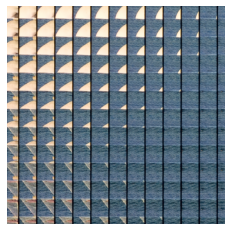

In [7]:
#plot raw image
@interact(x=(0,n-1,1), y=(0,m-1,1))
def render(x, y):
    fig, ax = plt.subplots() 
    ax.cla()
    ax.imshow(img[x:y,x:y])
    ax.axis('off')
    return None

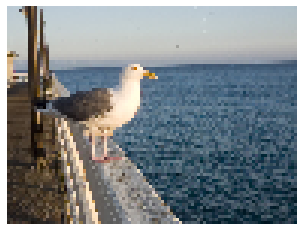

In [6]:
#sub aperture images

shifted = np.ones((v,u,3), dtype=int)

#plot
@interact(tx=(0,round(s),1), ty=(0,round(s),1))
def render(tx, ty):
    for a in range(u):
        for b in range(v):
            shifted[b,a,:]=img[ round(ty+s*b) , round(tx+s*a) ]
    
    fig, ax = plt.subplots() 
    ax.cla()
    ax.imshow(shifted)
    ax.axis('off')
    return None

(-0.5, 3399.5, 2279.5, -0.5)

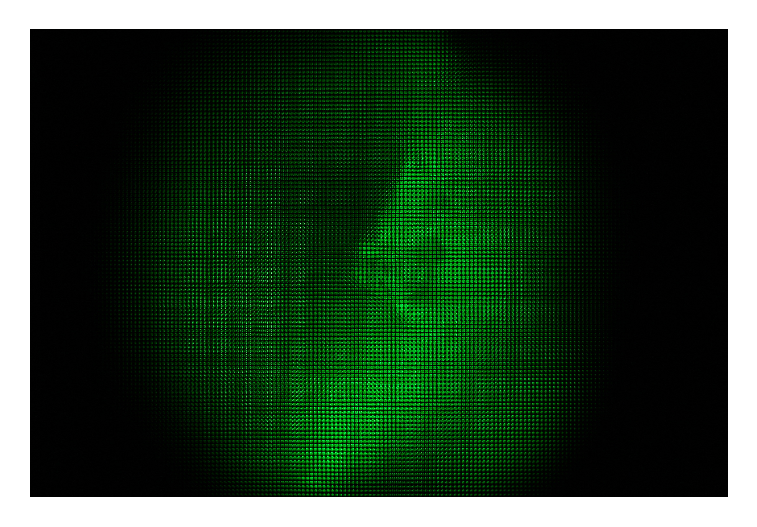

In [12]:
img = cv2.imread('data/fluorcrayons.jpg')
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#plot
fig = plt.figure(figsize=(3,3), dpi=300)
plt.subplot(1,1,1)
plt.imshow(img)
#plt.colorbar()
plt.axis('off')

In [13]:
#crop image

n,m,l = img.shape # image shape
s = 20 # shift between subimages
x,y=0,0 # offset
u,v=round((m-x)//s)-1, round((n-y)//s)-1 # number of micro ylenses


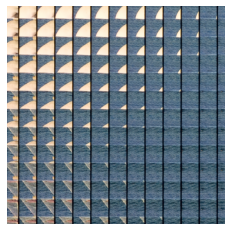

In [8]:
#plot raw image
@interact(x=(0,n-1,1), y=(0,m-1,1))
def render(x, y):
    fig, ax = plt.subplots() 
    ax.cla()
    ax.imshow(img[x:y,x:y])
    ax.axis('off')
    return None

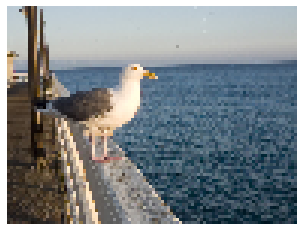

In [9]:
#sub aperture images

shifted = np.ones((v,u,3), dtype=int)

#plot
@interact(tx=(0,s,1), ty=(0,s,1))
def render(tx, ty):
    for a in range(u):
        for b in range(v):
            shifted[b,a,:]=img[ round(ty+s*b) , round(tx+s*a) ]
    
    fig, ax = plt.subplots() 
    ax.cla()
    ax.imshow(shifted)
    ax.axis('off')
    return None